In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pywt
import cv2

plt.rcParams['figure.figsize'] = [10, 8]

# Wavelet refinements

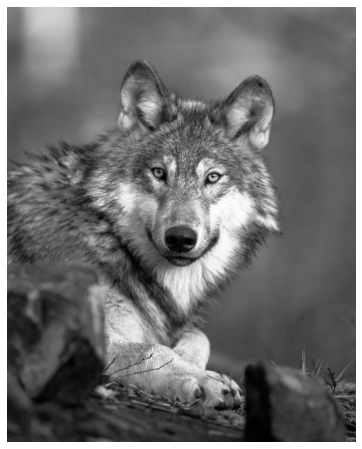

In [13]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')
plt.axis('off');

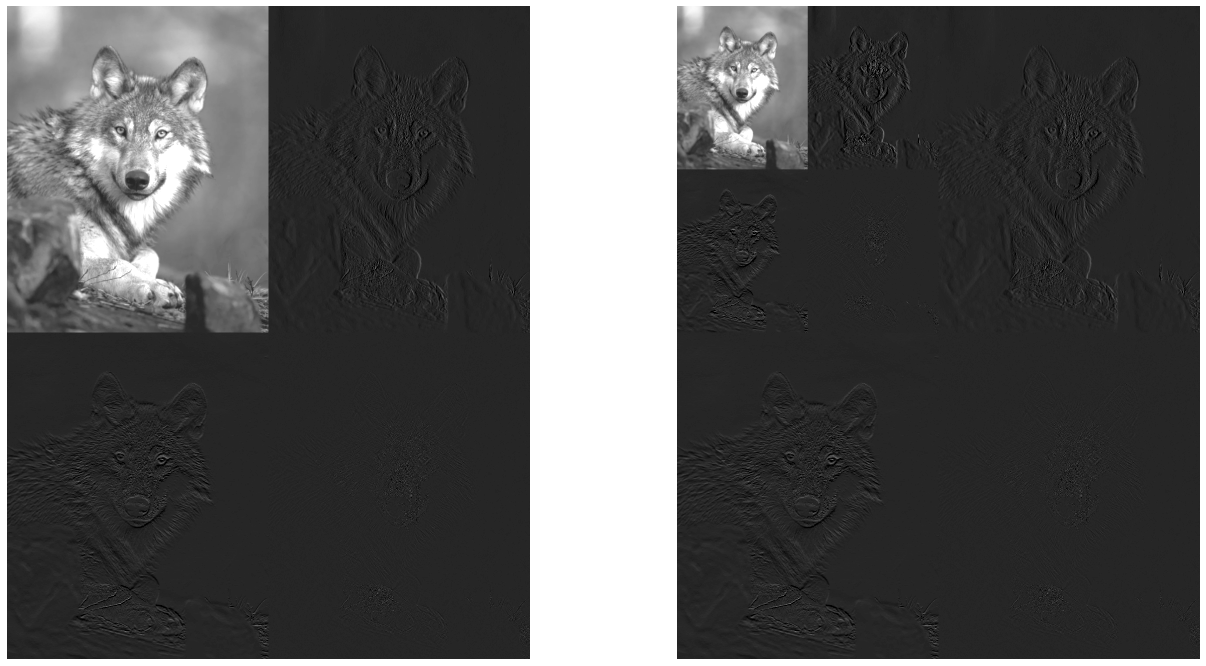

In [42]:
levels = [1, 2]
imgs = []

for level in levels:
    coeffs = pywt.wavedec2(image, wavelet='haar', level=level)

    coeffs[0] /= np.abs(coeffs[0]).max()
    for detail_level in range(level):
        coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

    arr, _ = pywt.coeffs_to_array(coeffs)
    imgs.append(arr)

fig = plt.figure(figsize=(22, 12))
for i in range(len(levels)):
    ax = fig.add_subplot(1, len(levels), i+1)
    plt.imshow(imgs[i], cmap='gray', vmin=-0.15, vmax=0.85)
    plt.axis('off');

# Wavelet VS FFT

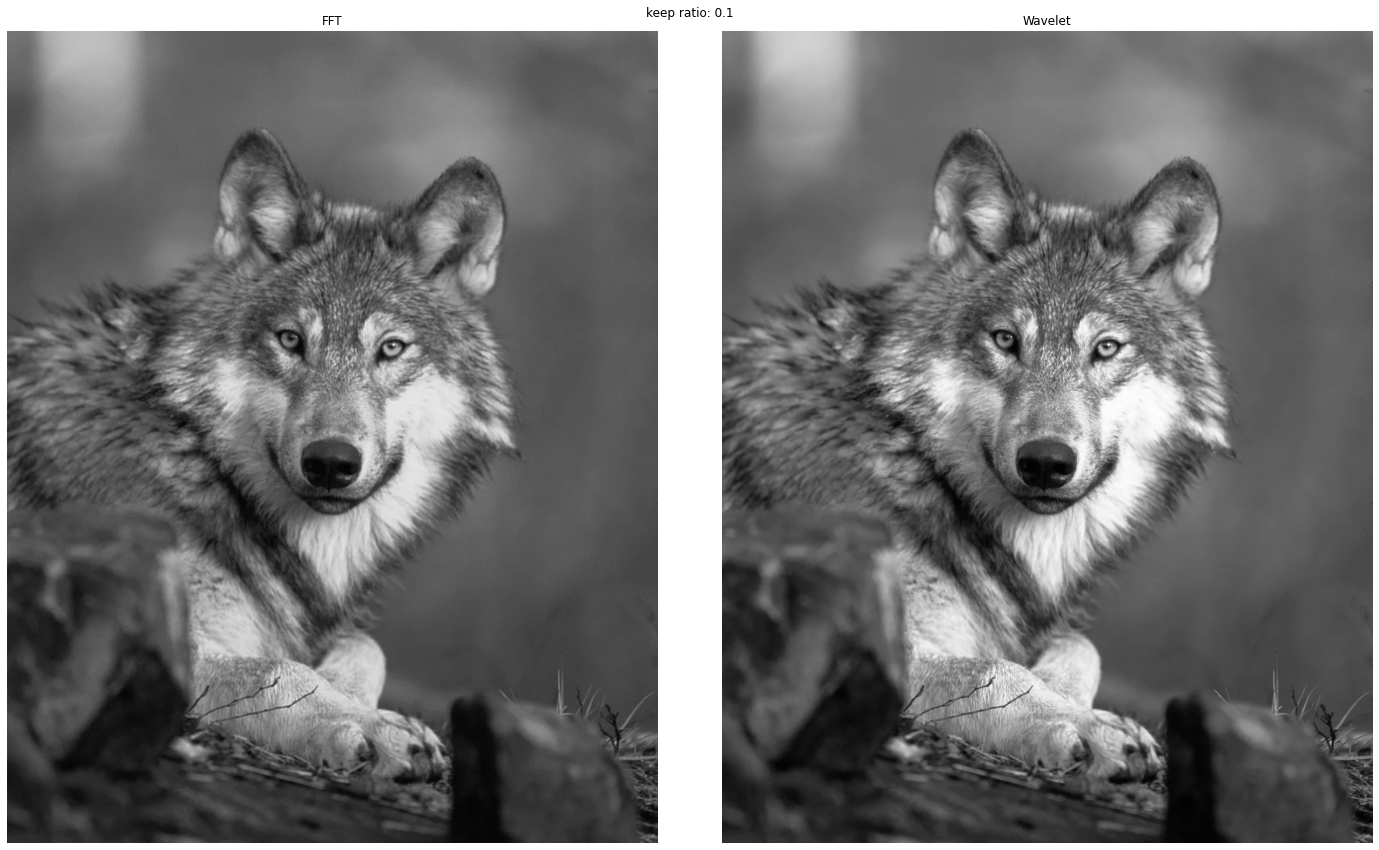

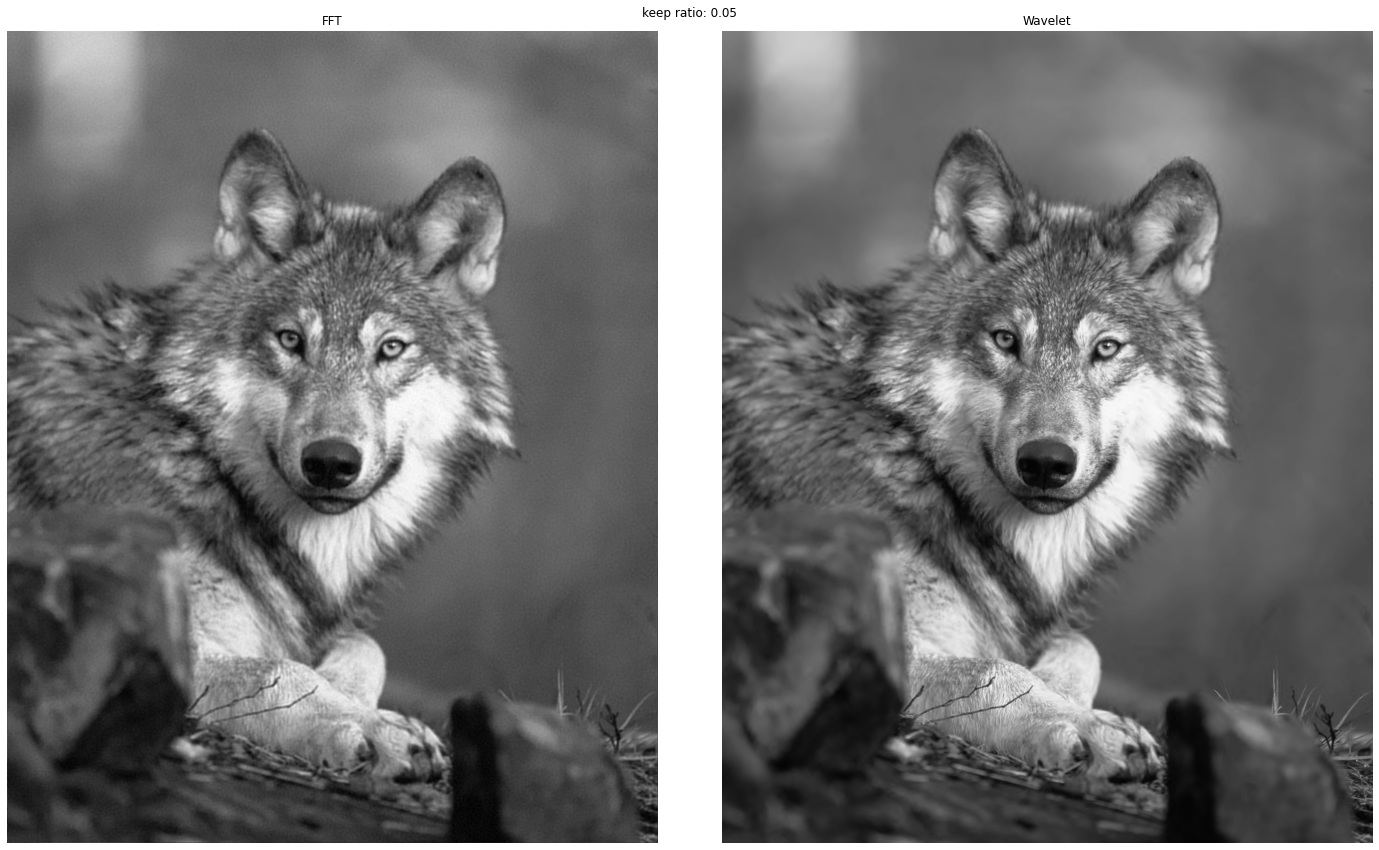

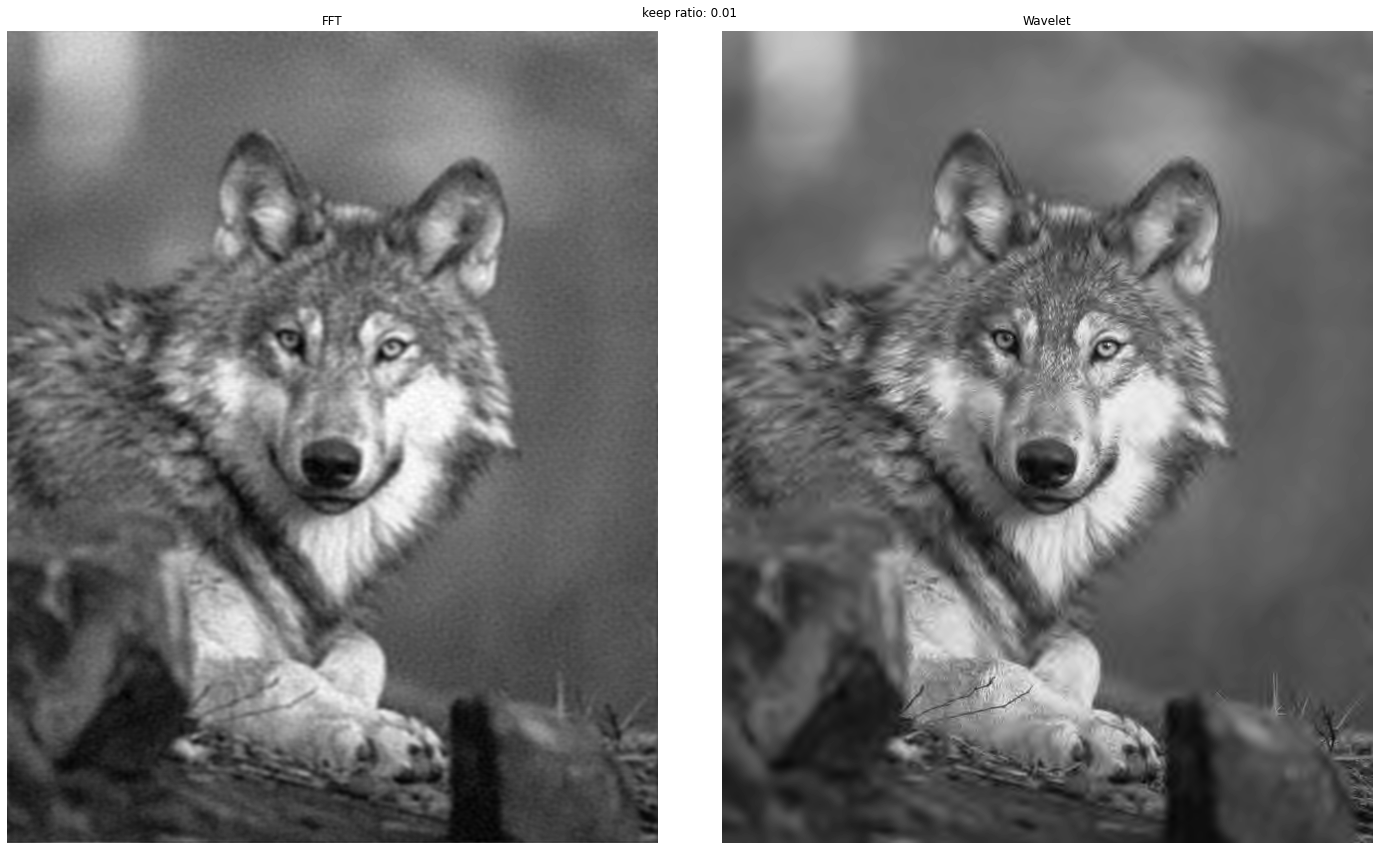

In [75]:
wavelet_name = 'coif7'
fft = np.fft.fft2(image)
wvt = pywt.wavedec2(image, wavelet=wavelet_name, level=4)
wvt, wvt_slices = pywt.coeffs_to_array(wvt)

fft_sort = np.sort(np.abs(fft.reshape(-1)))
wvt_sort = np.sort(np.abs(wvt.reshape(-1)))

ratios = [0.1, 0.05, 0.01]

for row, keep in enumerate(ratios):
    thresh_fft = fft_sort[int(np.floor((1-keep)*len(fft_sort)))]
    thresh_wvt = wvt_sort[int(np.floor((1-keep)*len(wvt_sort)))]

    fft_filt = fft * (np.abs(fft) > thresh_fft)
    wvt_filt = wvt * (np.abs(wvt) > thresh_wvt)
    wvt_filt = pywt.array_to_coeffs(wvt_filt, wvt_slices, output_format='wavedec2')

    ifft = np.fft.ifft2(fft_filt).real
    iwvt = pywt.waverec2(wvt_filt, wavelet=wavelet_name)

    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(ifft, cmap='gray')
    plt.axis('off')
    plt.title('FFT')
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(iwvt, cmap='gray')
    plt.axis('off')
    plt.title('Wavelet')
    fig.suptitle(f'keep ratio: {keep}')
    plt.tight_layout()